__Hierarchical clustering__ groups data over a variety of scales by creating a cluster tree or dendrogram. The tree is not a single set of clusters but rather a multilevel hierarchy, where clusters at one level are joined as clusters at the next level. This allows you to decide the level or scale of clustering that is most appropriate for your application.

__K-means clustering__ is a partitioning method. The data is partitioned into k mutually exclusive clusters and returns the index of the cluster to which it has assigned each observation. Unlike hierarchical clustering, k-means clustering operates on actual observations (rather than the larger set of dissimilarity measures) and creates a single level of clusters. The distinctions mean that k-means clustering is often more suitable than hierarchical clustering for large amounts of data. k-means treats each observation in your data as an object having a location in space. It finds a partition in which objects within each cluster are as close to each other as possible and as far from objects in other clusters as possible

__Gaussian mixture models__ assign each observation to a cluster by maximizing the posterior probability that the data point belongs to its assigned cluster.

In machine learning, __lazy learning__ is a learning method in which generalization beyond the training data is delayed until a query is made to the system, as opposed to in eager learning, where the system tries to generalize the training data before receiving queries.

The main advantage gained in employing a lazy learning method, such as case-based reasoning, is that the target function will be approximated locally, __such as in the k-nearest neighbor__ algorithm. Because the target function is approximated locally for each query to the system, lazy learning systems can simultaneously solve multiple problems and deal successfully with changes in the problem domain.

The disadvantages with lazy learning include the large space requirement to store the entire training dataset. Particularly noisy training data increases the case base unnecessarily, because no abstraction is made during the training phase. Another disadvantage is that lazy learning methods are usually slower to evaluate, though this is coupled with a faster training phase.

__Lazy classifiers are most useful for large datasets with few attributes__.

__Fuzzy c-means (FCM)__ is a data-clustering technique wherein each data point belongs to a cluster to some degree that is specified by a membership grade. FCM allows one piece of data to belong to two or more clusters.

__Self Organizing Maps__ Dimensional reduction when we have non-normal distributions. At each stage of representation, or processing, each piece of incoming information is kept in its proper context/neighborhood.

Topology is a mathematical discipline that studies shape. __Topological data analysis (TDA)__ refers to the adaptation of this discipline to analyzing highly complex data. It draws on the philosophy that all data have an underlying shape and that shape has meaning.

The analysis creates a summary or compressed representation of all of the data points to help rapidly uncover critical patterns and relationships in data. By identifying the geometric relationships that exist between data points, TDA offers an extremely simple way of interrogating data to understand the underlying properties that characterize the segments and subsegments that lie within data.

In [ ]:
import numpy as numpy
from itertools import product
from sklearn.metrics import accuracy_score # other metrics?
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn import datasets
from IPython.display import Image

Adapt this code below to run your analysis

Due before live class 2
1. Write a function to take a list or dictionary of clfs and hypers ie use logistic regression, each with 3 different sets of hyper parrameters for each

From Wikipedia, the free encyclopedia  

In machine learning, __hyperparameter__ optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm.

The same kind of machine learning model can require different constraints, weights or learning rates to generalize different data patterns. These measures are called hyperparameters, and have to be tuned so that the model can optimally solve the machine learning problem. Hyperparameter optimization finds a tuple of hyperparameters that yields an optimal model which minimizes a predefined loss function on given independent data.[1] The objective function takes a tuple of hyperparameters and returns the associated loss.[1] Cross-validation is often used to estimate this generalization performance.[2]

__Create Data__

In [12]:
x = numpy.array([[1,2],[3,4],[4,5],[4,5],[4,5],[4,5],[4,5],[4,5]])
y = numpy.random.choice([0,1],size=(x.shape[0])) #creates an array of 1's in the same as rows in M
# iris = datasets.load_iris()
# x = iris.data
# y = iris.target
n_folds = 5
data = (x, y, n_folds) #creates a tuple; a tuple is same as list but immutable (Cant be changed)

__Create Classifier Algorithm Lists and Dictionaries__  
I need to revisit to make this take in data like below
https://docs.python.org/3/library/itertools.html
look at product()

In [ ]:
def run(a_Classifier, data, Classifier_hyper={}):
    x, y, n_folds = data  # unpack data containter
    kf = KFold(n_splits=n_folds) # Establish the cross validation
    ret = {} # classic explicaiton of results as dictionary
    for ids, (train_index, test_index) in enumerate(kf.split(x, y)):
        print("k fold = ", ids)
        print("            train indexes = ", train_index)
        print("            test indexes = ", test_index)
        Classifier = a_Classifier(**Classifier_hyper) # unpack paramters into clf is they exist
        Classifier.fit(x[train_index], y[train_index])
        pred = Classifier.predict(x[test_index])
        ret[ids]= {'Classifier': Classifier,
               'train_index': train_index,
               'test_index': test_index,
               'accuracy': accuracy_score(y[test_index], pred)},
        return ret

algorithmlist = [RandomForestClassifier,LogisticRegression]
for algorithms in algorithmlist:
    results = run(algorithms, data, Classifier_hyper={})
    print(results)

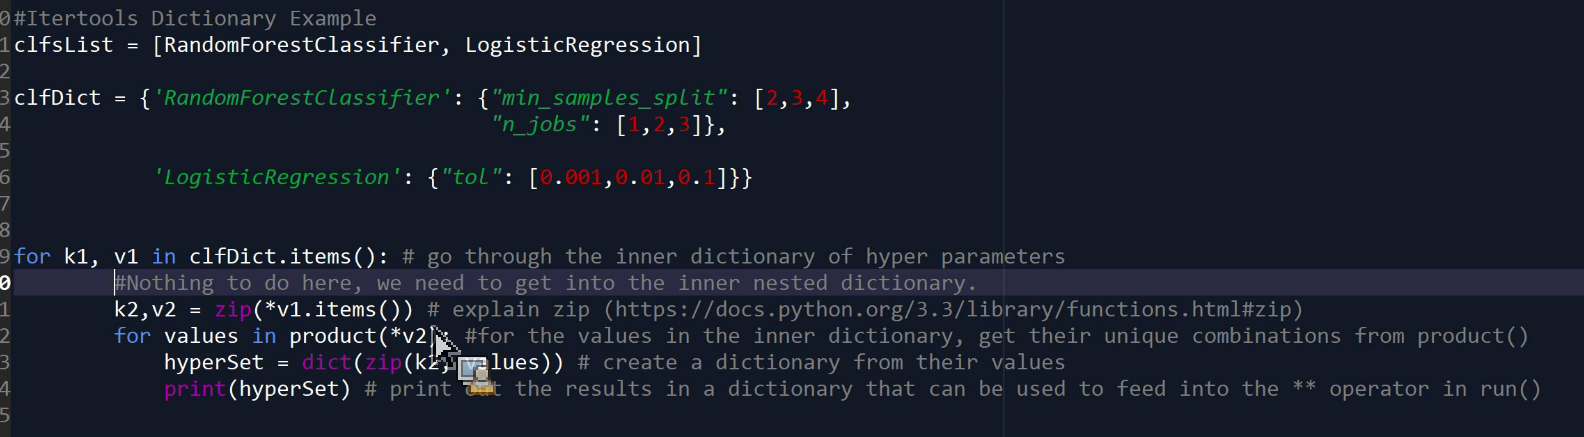

In [11]:
Image("capture.png")

In [24]:
#copied and adapted from Christopher Havenstein office hours presentation
listOfClassifiers = [RandomForestClassifier, LogisticRegression]
classifierParametersDictionary = {'RandomForestClassifier':{"min_samples_split": [2,3,4]},
                                  'LogisticRegression':{"tol":[0.001,0.01,0.1]}}

def classifierFunction(listOfClassifiers):
    for everything in (listOfClassifiers):
        #check if values in clfslist are in clfDict
        classifierDecriptionString = str(everything)
        print("Classifier: ", classifierDecriptionString)
        for outerKeys, outerValues in classifierParametersDictionary.items(): #go through first level of clfDict
            if outerKeys in classifierDecriptionString: #if clfString matches
                for innerKeys,innerValues in outerValues.items(): #go through inner dictionary of hypers
                    print("Parameter : ",innerKeys) #for each yper parameter in the inner list 
                    for values in innerValues: # go through the values for each hyper parameter
                        print("Value: ",values) # and show them
for Classifiers in listOfClassifiers:
    results = classifierFunction(listOfClassifiers)
    #print(results)

Classifier:  <class 'sklearn.ensemble.forest.RandomForestClassifier'>
Parameter :  min_samples_split
Value:  2
Value:  3
Value:  4
Classifier:  <class 'sklearn.linear_model.logistic.LogisticRegression'>
Parameter :  tol
Value:  0.001
Value:  0.01
Value:  0.1
Classifier:  <class 'sklearn.ensemble.forest.RandomForestClassifier'>
Parameter :  min_samples_split
Value:  2
Value:  3
Value:  4
Classifier:  <class 'sklearn.linear_model.logistic.LogisticRegression'>
Parameter :  tol
Value:  0.001
Value:  0.01
Value:  0.1


In [25]:
listCombinations= list(product(classifierList,classifierParametersDictionary.items()))
for values in listCombinations: 
        print(values)

(<class 'sklearn.ensemble.forest.RandomForestClassifier'>, ('RandomForestClassifier', {'min_samples_split': [2, 3, 4]}))
(<class 'sklearn.ensemble.forest.RandomForestClassifier'>, ('LogisticRegression', {'tol': [0.001, 0.01, 0.1]}))
(<class 'sklearn.linear_model.logistic.LogisticRegression'>, ('RandomForestClassifier', {'min_samples_split': [2, 3, 4]}))
(<class 'sklearn.linear_model.logistic.LogisticRegression'>, ('LogisticRegression', {'tol': [0.001, 0.01, 0.1]}))


In [ ]:
# #copied and adapted from Christopher Havenstein office hours presentation

# classifierList = [RandomForestClassifier, LogisticRegression]
# classifierParametersDictionary = {'RandomForestClassifier':{"min_samples_split": [2,3,4]},
#                                   'LogisticRegression':{"tol":[0.001,0.01,0.1]}}

# def classifierFunction(classifierList):
#     for description in (classifierList):
#         #check if values in clfslist are in clfDict
#         classifierDecriptionString = str(description)
#         print("classifierDecriptionString: ", classifierDecriptionString)
        
#         for outerKeys, outerValues in classifierParametersDictionary.items(): #go through first level of clfDict
#             if outerKeys in classifierDecriptionString: #if clfString matches
#                 for innerKeys,innerValues in outerValues.items(): #go through inner dictionary of hypers
#                     print(innerKeys) #for each yper parameter in the inner list 
#                     for values in innerValues: # go through the values for each hyper parameter
#                         print(values) # and show them
# for clfs in classifierList:
#     results = classifierFunction(classifierList)
#     print(results)

Due before live class 3
2. expand to include larger number of classifiers and hyperparmater settings
3. find some simple data
4. generate matplotlib plots that will assist in identifying the optimal clf and parampters settings

Due before live class 4
5. Please set up your code to be run and save the results to the directory that its executed from
6. Investigate grid search function